In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("train.csv")
df.head(30)

c:\users\phamthai\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_48,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
0,0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2547.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Tỉnh Đồng Nai,Thành phố Biên Hòa,44.0,44.0,None,1,0.0,-1.0,...,False,True,29.770,17.561,30.955,31.171,0.00,0.04,0.00,0.00
2,2,0,Tỉnh Đồng Nai,Huyện Long Thành,30.0,30.0,Công nhân,0,1.0,3273.0,...,True,True,29.770,56.512,30.955,31.171,0.00,0.16,0.00,0.00
3,3,0,Tỉnh Tuyên Quang,Thành phố Tuyên Quang,43.0,NaN,NaN,0,1.0,3991.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,Thành phố Hồ Chí Minh,Quận 1,21.0,21.0,None,0,1.0,1450.0,...,True,True,29.770,13.789,30.955,31.171,0.00,0.03,0.00,0.00
5,5,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1812.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0,NaN,NaN,NaN,28.0,2983,1,0.0,-1.0,...,False,True,29.770,4.413,30.955,31.171,0.00,0.00,0.00,0.00
7,7,0,Tỉnh Bắc Giang,Huyện Yên Dũng,40.0,32.0,Công nhân,1,1.0,2906.0,...,True,True,29.770,40.683,30.955,31.171,0.00,0.13,0.00,0.00
8,8,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2544.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.maCv.value_counts()[:10]

None                         13203
Công nhân                      766
công nhân                      465
Nhân viên                      304
Giáo viên                      215
Công Nhân                      126
Công nhân may công nghiệp      108
Công nhân sản xuất             102
nhân viên                      102
Công nhân may                   92
Name: maCv, dtype: int64

In [4]:
df.maCv = df['maCv'].str.lower()
df.maCv.value_counts()[:10]

none                         13203
công nhân                     1389
nhân viên                      449
giáo viên                      289
công nhân may                  150
công nhân may công nghiệp      137
công nhân sản xuất             130
công nhân viên                  69
nhân viên bán hàng              66
nhân viên sản xuất              56
Name: maCv, dtype: int64

In [5]:
index_cn0 = df.maCv[df.maCv.str.contains("công nhân")==True].index
index_cn1 = df.maCv[df.maCv.str.contains("cn")==True].index
index_cn0 = index_cn0.tolist() + index_cn1.tolist()

index_nv0 = df.maCv[df.maCv.str.contains("nhân viên")==True].index
index_nv1 = df.maCv[df.maCv.str.contains("nv")==True].index
index_nv0 = index_nv0.tolist() + index_nv1.tolist()

index_tx0 = df.maCv[df.maCv.str.contains("tài xế")==True].index
index_tx1 = df.maCv[df.maCv.str.contains("lái xe")==True].index
index_tx0 = index_tx0.tolist() + index_tx1.tolist()

index_gv0 = df.maCv[df.maCv.str.contains("giáo viên")==True].index
index_gv1 = df.maCv[df.maCv.str.contains("gv")==True].index
index_gv2 = df.maCv[df.maCv.str.contains("giảng viên")==True].index

index_gv0 = index_gv0.tolist() + index_gv1.tolist() + index_gv2.tolist()

df.maCv.loc[index_cn0] = "công nhân"
df.maCv.loc[index_nv0] = "nhân viên"
df.maCv.loc[index_tx0] = "tài xế"
df.maCv.loc[index_gv0] = "giáo viên"

c:\users\phamthai\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
a = (df.maCv.value_counts()<50)
df.maCv.loc[df[df.maCv.isin(a[a==True].keys())].index]='others'

In [7]:
df.head(15)

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_48,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
0,0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2547.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Tỉnh Đồng Nai,Thành phố Biên Hòa,44.0,44.0,none,1,0.0,-1.0,...,False,True,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0
2,2,0,Tỉnh Đồng Nai,Huyện Long Thành,30.0,30.0,công nhân,0,1.0,3273.0,...,True,True,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0
3,3,0,Tỉnh Tuyên Quang,Thành phố Tuyên Quang,43.0,NaN,NaN,0,1.0,3991.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,Thành phố Hồ Chí Minh,Quận 1,21.0,21.0,none,0,1.0,1450.0,...,True,True,29.77,13.789,30.955,31.171,0.0,0.03,0.0,0.0
5,5,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1812.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0,NaN,NaN,NaN,28.0,others,1,0.0,-1.0,...,False,True,29.77,4.413,30.955,31.171,0.0,0.00,0.0,0.0
7,7,0,Tỉnh Bắc Giang,Huyện Yên Dũng,40.0,32.0,công nhân,1,1.0,2906.0,...,True,True,29.77,40.683,30.955,31.171,0.0,0.13,0.0,0.0
8,8,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2544.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import matplotlib.pyplot as plt

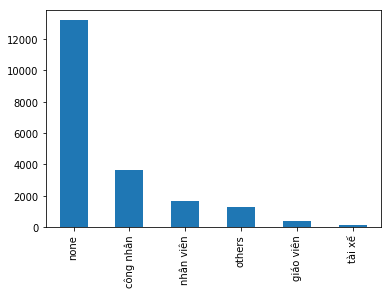

In [9]:
df.maCv.value_counts().plot.bar()
plt.show()